In [5]:
import torch
import torch.nn as nn
from torch.nn import functional as F
import numpy as np
import time

device = "mps" if torch.backends.mps.is_available() else "cpu"
device = torch.device(device)
print(device)

mps


In [6]:
%%time
start_time = time.time()
# matrix operations here
zeros = torch.zeros(1, 1)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")

0.00074577
CPU times: user 523 µs, sys: 320 µs, total: 843 µs
Wall time: 819 µs


using the time library to record execution time
%%time to record the time taken for the cell to execute

In [7]:
torch_rand1 = torch.rand(100, 100, 100, 100).to(device)
torch_rand2 = torch.rand(100, 100, 100, 100).to(device)
np_rand1 = torch.rand(100, 100, 100, 100)
np_rand2 = torch.rand(100, 100, 100, 100)

start_time = time.time()

rand = (torch_rand1 @ torch_rand2)

end_time = time.time()

elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")


start_time = time.time()

rand = np.multiply(np_rand1, np_rand2)
end_time = time.time()
elapsed_time = end_time - start_time
print(f"{elapsed_time:.8f}")

0.01764584
0.11343622


In [8]:
# embeddings, torch.stack, torch.multinomial, torch.tril, torch.triu, input.T / input.transpose, nn.Linear, torch.cat, F.softmax (show all the examples of functions/methods with pytorch docs)


# Define a probability tensor
probabilities = torch.tensor([0.1, 0.9])
# 10% or 0.1 => 0, 90% or 0.9 => 1. each probability points to the index of the probability in the tensor
# Draw 5 samples from the multinomial distribution
samples = torch.multinomial(probabilities, num_samples=10, replacement=True)
print(samples)


tensor([1, 0, 1, 1, 1, 0, 1, 1, 1, 1])


In [23]:
tensor = torch.tensor([1, 2, 3, 4])
out = torch.cat((tensor, torch.tensor([5])), dim=0)
out

tensor([1, 2, 3, 4, 5])

In [10]:
out = torch.tril(torch.ones(5, 5))
out

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [11]:
out = torch.triu(torch.ones(5, 5))
out

tensor([[1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1.],
        [0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 1.]])

In [12]:
out = torch.zeros(5, 5).masked_fill(torch.tril(torch.ones(5, 5)) == 0, float('-inf'))
out

tensor([[0., -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0.]])

In [13]:
torch.exp(out)

tensor([[1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1.]])

In [14]:
input = torch.zeros(2, 3, 4)
out1 = input.transpose(0, 1)
out2 = input.transpose(-2,-1)
print(out1.shape)
print(out2.shape)
# torch.permute works the same but you provide the new order of dimensions instead of the dimensions you'd like to swap.

torch.Size([3, 2, 4])
torch.Size([2, 4, 3])


In [15]:
tensor1 = torch.tensor([1, 2, 3])
tensor2 = torch.tensor([4, 5, 6])
tensor3 = torch.tensor([7, 8, 9])

# Stack the tensors along a new dimension
stacked_tensor = torch.stack([tensor1, tensor2, tensor3])
stacked_tensor


tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

'nn.Linear' en PyTorch es una capa que aplica una transformación lineal a los datos de entrada. Toma los datos de entrada, los multiplica por pesos y añade un sesgo. Se utiliza para conectar nodos de diferentes capas en una red neuronal.

'Sequential' en PyTorch es un contenedor que permite combinar múltiples capas de red neuronal de manera secuencial. Facilita la construcción de modelos al permitir agregar capas en el orden en que los datos deben pasar a través de ellas.

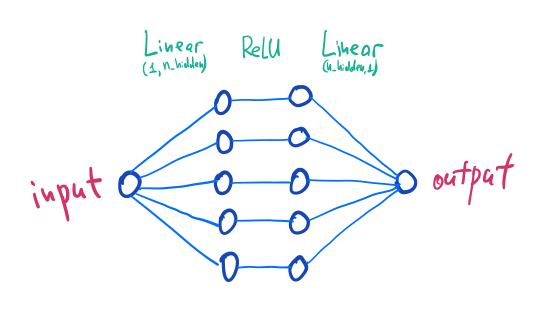

In [26]:
from IPython.display import SVG
from IPython.display import Image


SVG(filename='torch101network1-5-1.svg')

In [16]:
import torch.nn as nn
sample = torch.tensor([10.,10.,10.])
linear = nn.Linear(3, 3, bias=False)
print(linear(sample))

tensor([-3.8775,  3.2500, -5.6095], grad_fn=<SqueezeBackward4>)


In [17]:
import torch.nn.functional as F

# Create a tensor
tensor1 = torch.tensor([1.0, 2.0, 3.0])

# Apply softmax using torch.nn.functional.softmax()
softmax_output = F.softmax(tensor1, dim=0)

print(softmax_output)

tensor([0.0900, 0.2447, 0.6652])


$$
s(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$


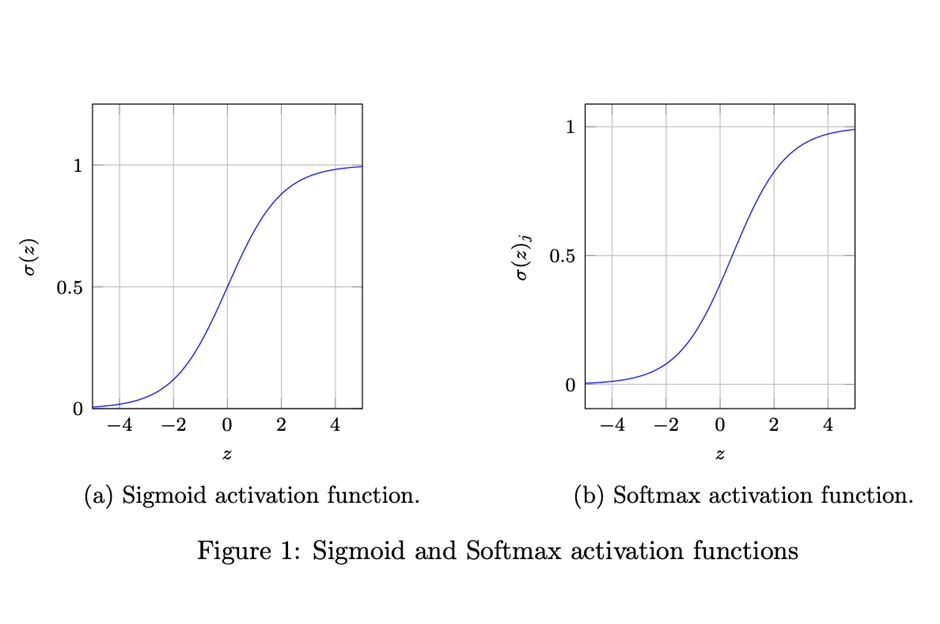

In [27]:
Image(filename='softmax.png')

Imagina que tienes un enorme casillero donde cada cajón tiene un número único y dentro de cada cajón hay un balón de fútbol. Cada balón tiene características únicas: algunos son más pesados, otros más ligeros, algunos con más rebote, etc. Cuando alguien te da un número, puedes ir al casillero y sacar el balón que tiene exactamente esas características. Esto es parecido a lo que hace una capa de embedding (embebido) en una red neuronal.

En el código que has proporcionado, estás creando un "casillero" virtual (embedding) con 80 cajones (vocab_size = 80), y cada balón de fútbol dentro de los cajones no es realmente un balón sino un vector de 6 números (embedding_dim = 6).

Esto significa que puedes pedirle al casillero el balón (vector) correspondiente a cualquier número del 0 al 79 (porque tienes 80 cajones). Pero en lugar de números, hablamos de palabras o conceptos, y cada vector representa el "significado" de esa palabra en un espacio matemático.

Aquí, estás diciendo "quiero los balones (vectores) de los cajones número 1, 5, 3 y 2".

Ahora, el casillero te da esos balones (vectores). Dado que cada vector tiene 6 números, y pediste 4 vectores, acabas con una matriz de forma (4, 6). Esto significa 4 filas de vectores, cada una con 6 elementos.

Al final, cuando imprimes embedded_output.shape, estás verificando que tienes 4 vectores de 6 elementos cada uno. Y print(embedded_output) te muestra los vectores reales que obtuviste del casillero. Cada uno de estos vectores es una representación numérica del "significado" de cada palabra o concepto que has pedido.


In [29]:
vocab_size = 80
embedding_dim = 6

# Initialize an embedding layer
embedding = nn.Embedding(vocab_size, embedding_dim)

# Create some input indices
input_indices = torch.LongTensor([1, 5, 3, 2])

# Apply the embedding layer
embedded_output = embedding(input_indices)

# The output will be a tensor of shape (4, 6)
print(embedded_output.shape)
print(embedded_output)


torch.Size([4, 6])
tensor([[-1.0664, -0.6427, -1.7091,  0.9312, -0.6849,  0.3197],
        [-1.2441, -0.5766,  0.8224, -0.9668,  0.9316, -1.1420],
        [ 0.2902, -0.1183,  0.5979, -1.5995, -1.3676, -1.7142],
        [-2.6359, -1.2796, -1.9871, -0.3528,  0.4639,  1.5610]],
       grad_fn=<EmbeddingBackward0>)


In [30]:
a = torch.tensor([[1,2],[3,4],[5,6]])
b = torch.tensor([[7,8,9],[10,11,12]])
# print(a @ b)
print(torch.matmul(a, b))

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])


In [20]:
int_64 = torch.randint(1, (3, 2)).float()
#type int64
float_32 = torch.rand(2,3)
#type float32
# print(int_64.dtype, float_32.dtype)
result = torch.matmul(int_64, float_32)
print(result)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [40]:
a = torch.rand(2, 3, 5)
print(a.shape)
x, y, z = a.shape
a = a.view(x,y,z)
print(x, y, z)
print(a.shape)

torch.Size([2, 3, 5])
2 3 5
torch.Size([2, 3, 5])


In [ ]:
x = torch.tensor([10], dtype=torch.float32)
y = F.tanh(x)
print(y)

tensor([1.])
